<a href="https://colab.research.google.com/github/JoseLuisBarba/deepLearning/blob/main/digitalImgeProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Imagen Digital**

> (Escala de grises) Es una representación de una imagen bidimensional como un conjunto finito de valores digitales, llamados elementos de imagen o píxeles.
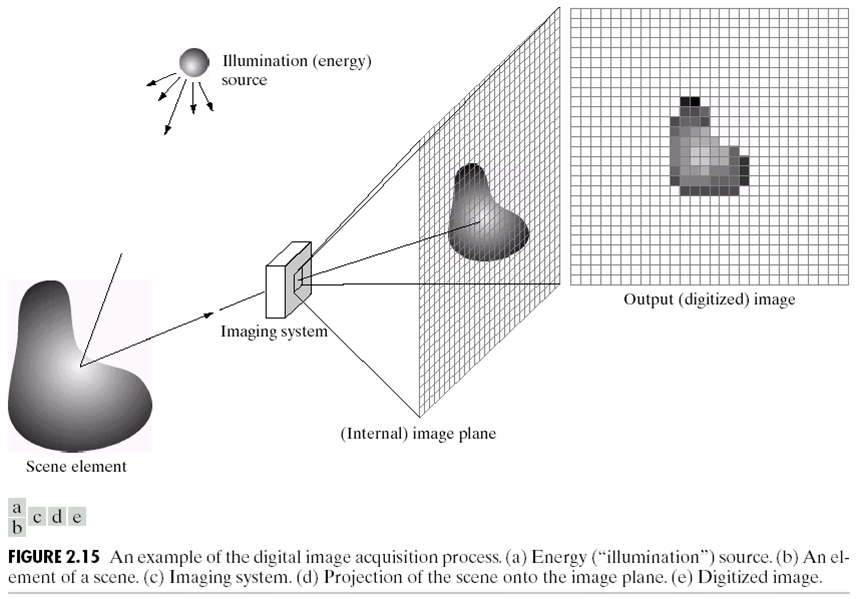

#**Pixel Digitalizado**

> Estos son los elementos de una imagen digital y normalmente representan niveles de gris, colores, alturas, opacidades, etc.
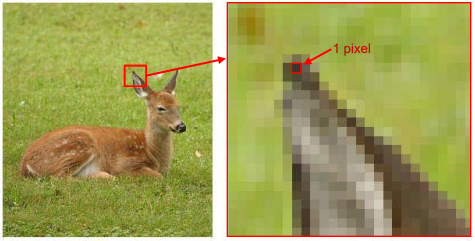



> Una imagen digital se puede escribir como una función

$f(x, y) = i(x,y) r(x,y)*$

$f(x, y)$: Intensidad en un punto dado (x, y)

$i(x, y)$: Iluminación at (x, y)

$r(x, y)$: Reflectancia/ Transmisividad en (x, y)

Como tratamos con vectores es bueno representar los datos en forma de matrices.

- La digitalización implica que una imagen digital es una aproximación a una escena real.

> Procesamiento de imagenes digitales

Es procesar/realizar múltiples operaciones a imágenes digitales con la ayuda de una computadora. Algunas tareas importantes:

- Mejora de la información pictórica para la interpretación humana.
- Procesamiento de datos de la imagen para almacenamiento, transmisión y representación para percepción autónoma de máquinas. Se divide principalmente en:

* Bajo nivel: Las entradas y salidas son imágenes (p. ej., eliminación de ruido, nitidez de imagen)

* Nivel medio: Las salidas son los atributos extraídos de las imágenes de entrada (por ejemplo: reconocimiento de objetos, segmentación de imágenes)

* Alto nivel: Un conjunto de reconocimiento de objetos individuales (Ej.: comprensión de la escena, navegación autónoma)

Exploremos lo mismo usando Python y OpenCV

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()


Saving scenary.jpg to scenary.jpg


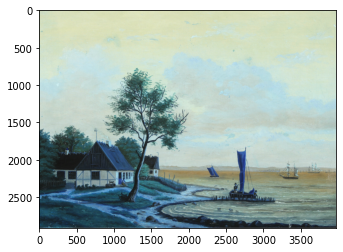

In [3]:
# leer una imagen
img = cv2.imread('scenary.jpg')
# Veamos como luce la imagen
plt.imshow(img)

In [5]:
print("Image Properties")
print("- Number of Pixels: " + str(img.size))
print("- Shape/Dimensions: " + str(img.shape))

Image Properties
- Number of Pixels: 34708128
- Shape/Dimensions: (2912, 3973, 3)


In [6]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

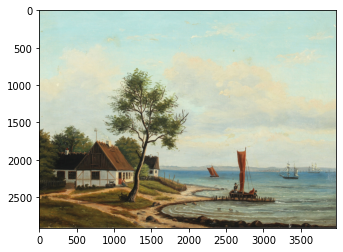

In [7]:
plt.imshow(img)

In [8]:
#convertir a scala de grises
grayImg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

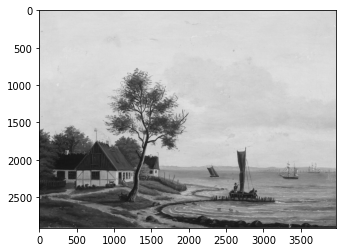

In [10]:
plt.imshow(grayImg)
# se debe convertir desde escala de grises a colores RGB para plt.imshow(), dado que plt.imshow espera un arreglo 3d
# trata de imprimir la misma directamente con gray_img y ve el resultado por ti mismo
plt.imshow(cv2.cvtColor(grayImg, cv2.COLOR_GRAY2RGB))

In [11]:
print(grayImg)

[[213 209 209 ... 213 214 213]
 [211 209 210 ... 213 214 214]
 [214 214 216 ... 211 214 215]
 ...
 [ 52  53  53 ...  31  32  32]
 [ 99 100 100 ...  79  80  80]
 [234 236 236 ... 239 239 239]]


#**Encontremos el color medio/promedio de la imagen.**

In [12]:
# encontrar el promedio por fila de img
# np.average() toma un argumento de eje que encuentra el promedio en ese axis.(axis=0)
averageColorPerRow = np.average(img, axis=0)

# encontrar el promedio a través del promedio por fila
averageColor = np.average(averageColorPerRow, axis=0)

# convertir de nuevo a uint8
averageColor = np.uint8(averageColor)
print(averageColor)

[168 175 155]


In [14]:
[averageColor]

[array([168, 175, 155], dtype=uint8)]

In [15]:
[averageColor]*5

[array([168, 175, 155], dtype=uint8),
 array([168, 175, 155], dtype=uint8),
 array([168, 175, 155], dtype=uint8),
 array([168, 175, 155], dtype=uint8),
 array([168, 175, 155], dtype=uint8)]

In [16]:
[[averageColor]*5]

[[array([168, 175, 155], dtype=uint8),
  array([168, 175, 155], dtype=uint8),
  array([168, 175, 155], dtype=uint8),
  array([168, 175, 155], dtype=uint8),
  array([168, 175, 155], dtype=uint8)]]

In [17]:
[[averageColor]*5]*5

[[array([168, 175, 155], dtype=uint8),
  array([168, 175, 155], dtype=uint8),
  array([168, 175, 155], dtype=uint8),
  array([168, 175, 155], dtype=uint8),
  array([168, 175, 155], dtype=uint8)],
 [array([168, 175, 155], dtype=uint8),
  array([168, 175, 155], dtype=uint8),
  array([168, 175, 155], dtype=uint8),
  array([168, 175, 155], dtype=uint8),
  array([168, 175, 155], dtype=uint8)],
 [array([168, 175, 155], dtype=uint8),
  array([168, 175, 155], dtype=uint8),
  array([168, 175, 155], dtype=uint8),
  array([168, 175, 155], dtype=uint8),
  array([168, 175, 155], dtype=uint8)],
 [array([168, 175, 155], dtype=uint8),
  array([168, 175, 155], dtype=uint8),
  array([168, 175, 155], dtype=uint8),
  array([168, 175, 155], dtype=uint8),
  array([168, 175, 155], dtype=uint8)],
 [array([168, 175, 155], dtype=uint8),
  array([168, 175, 155], dtype=uint8),
  array([168, 175, 155], dtype=uint8),
  array([168, 175, 155], dtype=uint8),
  array([168, 175, 155], dtype=uint8)]]

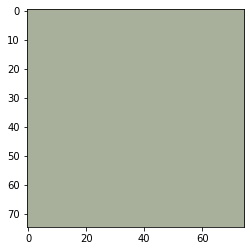

In [13]:
# cree una matriz de 75 x 75 píxeles con el valor del color promedio
average_color_img = np.array([[averageColor]*75]*75, np.uint8)

plt.imshow(average_color_img)

In [18]:
from google.colab import files
uploaded = files.upload()

Saving face.jpg to face.jpg


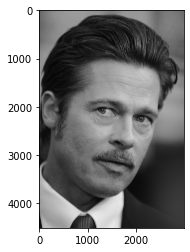

In [19]:
# Lea la imagen en escala de grises configurando 0 en los argumentos
img_gray = cv2.imread('face.jpg',0)
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_GRAY2RGB))

In [20]:
# asignando altura y ancho desde img_gray.shape
h,w = img_gray.shape[:2]
print(h, w)

4504 2988


In [21]:
img_gray.shape

(4504, 2988)

In [22]:
grad_img = np.asarray(img_gray)
# arreglo de 2 dimnensiones
print(grad_img)

[[ 97  97  97 ... 100 104 106]
 [ 98 100 102 ... 101 104 106]
 [ 97  99 100 ... 104 104 103]
 ...
 [ 13  13  14 ...  52  52  52]
 [ 13  13  13 ...  53  53  52]
 [ 14  15  14 ...  53  53  51]]


#**Apply gradient**

In [24]:
# aplicar degradado: restar el siguiente píxel del píxel actual
for i in range(0,h): # recorriendo la altura
  for j in range(0,w-1): # recorriendo a lo ancho
    min_pix_val = min(img_gray[i][j+1], img_gray[i][j])
    if min_pix_val == img_gray[i][j+1]:
      temp_arr = img_gray[i][j] - img_gray[i][j+1]
    else:
      temp_arr = img_gray[i][j+1] - img_gray[i][j]
    grad_img[i,j] = temp_arr


In [25]:
grad_img.shape

(4504, 2988)

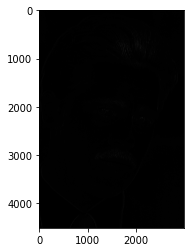

In [26]:
plt.imshow(cv2.cvtColor(grad_img,cv2.COLOR_GRAY2RGB))

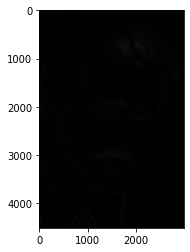

In [27]:
from PIL import Image
gradient_img = Image.fromarray(grad_img)
# Cmap='gray' -> convierte a escala de grises directamente
plt.imshow(gradient_img, cmap='gray')

In [29]:
img = cv2.imread('face.jpg')
B,G,R = cv2.split(img)
B[:] = [255-x for x in B] #invirtiendo azul
G[:] = [255-x for x in G] #invirtiendo verd
R[:] = [255-x for x in R] #invirtiendo rojo

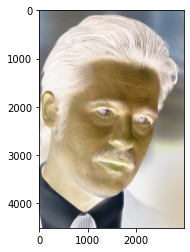

In [30]:
# guardando imagen
neg_img = cv2.merge((B, G, R))
plt.imshow(neg_img)

#**Umbral**

Umbral binario: supongamos que deseamos convertir una imagen en una imagen binaria, es decir, asignar un píxel a un valor de 0 o 1. Para hacer esto, podemos realizar un umbral. Por ejemplo, si el valor del Umbral (T) es 60, a todos los píxeles con valores superiores a 60 se les asignará un valor de 1, y a todos los píxeles con valores menores o iguales se les asignará un valor de 0.

In [31]:
from google.colab import files
uploaded = files.upload()

# cargar un archivo en el directorio de trabajo de colab
# el archivo fue descargado desde - https://upload.wikimedia.org/wikipedia/commons/0/0d/Upstate_New_York_Fall_Colors_-_Autumn_at_Church_Pond%2C_Paul_Smiths_%2830273943696%29.jpg

Saving forest.jpg to forest.jpg


In [32]:
img = cv2.imread('forest.jpg',cv2.IMREAD_COLOR)

In [34]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [37]:
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

In [47]:
#@title Texto de título predeterminado
umbral = 100 #@param {type:"integer"}
maxValue = 50 #@param {type:"integer"}
# umbral para la imagen en escala de grises de la foto del paisaje
_, threshold_img = cv2.threshold(img_gray, umbral, maxValue, cv2.THRESH_BINARY)

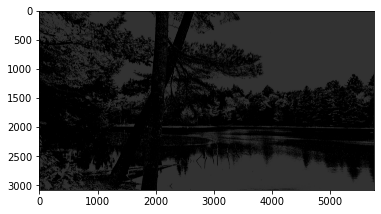

In [48]:
threshold_img = cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2RGB)
# plt.figure(figsize=(10,10))
plt.imshow(threshold_img)

## Experimenta con varios números

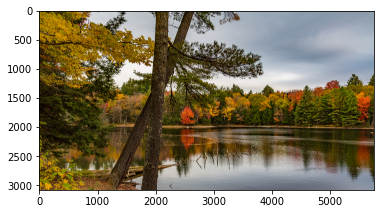

In [50]:
## Veamos cómo podemos usar esto en la eliminación de ruido.

# establezcamos un umbral para el canal de tono en el rango azul
blue_min = np.array([85, 60, 60], np.uint8)
blue_max = np.array([150, 255, 255], np.uint8)

upstate = cv2.imread('forest.jpg')
# El tono, la saturación y el valor (HSV) es un modelo de color que se usa a menudo en lugar del modelo de color RGB en programas gráficos y de pintura.
# Al usar este modelo de color, se especifica un color y luego se agrega blanco o negro para realizar fácilmente ajustes de color.
upstate_hsv = cv2.cvtColor(upstate, cv2.COLOR_BGR2HSV)
plt.imshow(cv2.cvtColor(upstate_hsv, cv2.COLOR_HSV2RGB))

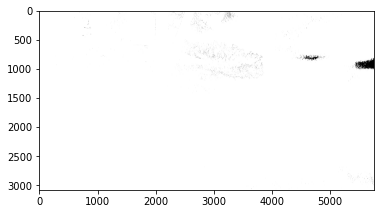

In [51]:
mask_inverse = cv2.inRange(upstate_hsv, blue_min, blue_max)
mask = cv2.bitwise_not(mask_inverse)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB))

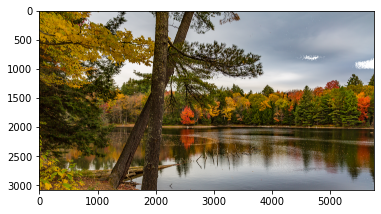

In [53]:
# convertir la máscara de un solo canal de nuevo en 3 canales
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)

# revisa bit a bit y aplica una máscara para obtener una imagen recortada que no sea azul
masked_upstate = cv2.bitwise_and(upstate, mask_rgb)

# reemplaza los trozos recortados con blanco
masked_replace_white = cv2.addWeighted(masked_upstate, 1, \
                                        cv2.cvtColor(mask_inverse, cv2.COLOR_GRAY2RGB), 1, 0)

plt.imshow(cv2.cvtColor(masked_replace_white, cv2.COLOR_BGR2RGB))

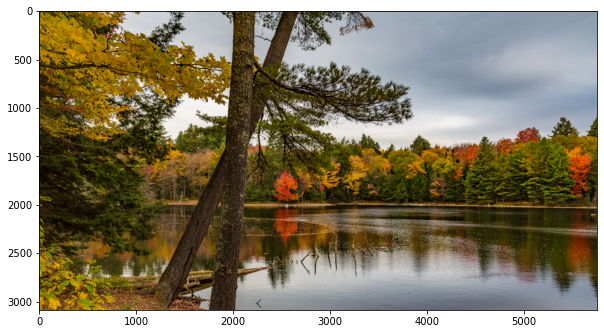

In [54]:
# preproceso con desenfoque, con kernel 5x5
img_blur_small = cv2.GaussianBlur(upstate, (5,5), 0)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_blur_small, cv2.COLOR_BGR2RGB))

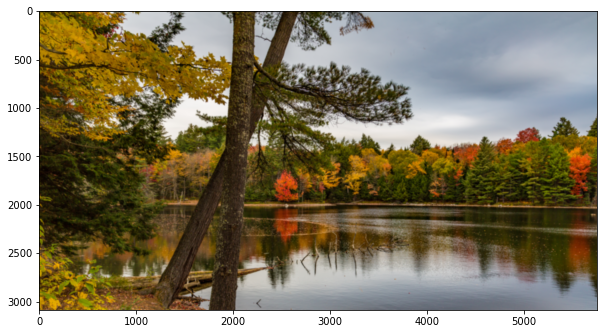

In [55]:
img_blur_small = cv2.GaussianBlur(upstate, (25,25), 0)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_blur_small, cv2.COLOR_BGR2RGB))

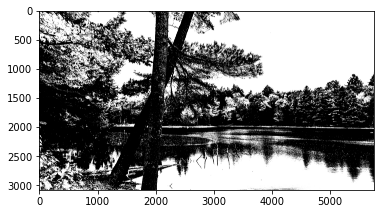

In [56]:
# umbral en imagen regular
gray_img = cv2.cvtColor(upstate, cv2.COLOR_BGR2GRAY)
_, threshold_img = cv2.threshold(gray_img, 100, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2RGB))

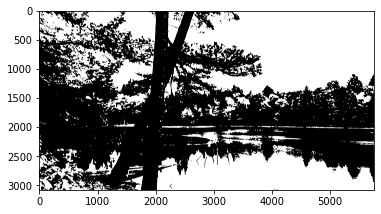

In [57]:
# umbral en imagen borrosa
gray_blur_img = cv2.cvtColor(img_blur_small, cv2.COLOR_BGR2GRAY)
_, threshold_img_blur = cv2.threshold(gray_blur_img, 100, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(threshold_img_blur, cv2.COLOR_GRAY2RGB))

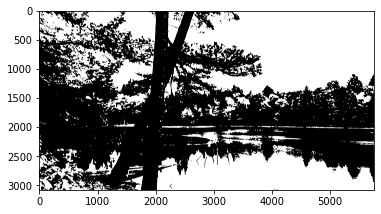

In [58]:
# umbral en imagen borrosa
gray_blur_img = cv2.cvtColor(img_blur_small, cv2.COLOR_BGR2GRAY)
_, threshold_img_blur = cv2.threshold(gray_blur_img, 100, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(threshold_img_blur, cv2.COLOR_GRAY2RGB))

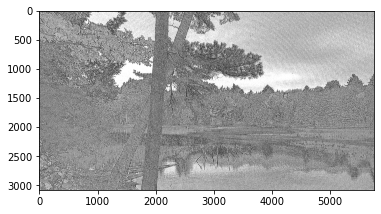

In [59]:
# utilizando umbral adaptativo en lugar de global
adaptive_thresh = cv2.adaptiveThreshold(gray_img,255,\
cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
cv2.THRESH_BINARY,11,2)
plt.imshow(cv2.cvtColor(adaptive_thresh, cv2.COLOR_GRAY2RGB))

In [60]:
# podemos usar este concepto de desenfoque en la segmentación
uploaded = files.upload()

Saving coins.jpg to coins.jpg


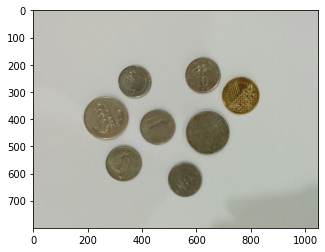

In [61]:
coins = cv2.imread('coins.jpg')
plt.imshow(cv2.cvtColor(coins, cv2.COLOR_BGR2RGB))

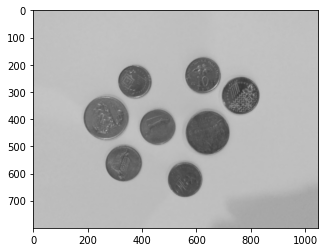

In [62]:
# se obtiene una imagen binaria y aplicar el desenfoque gaussiano
coins_gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
coins_preprocessed = cv2.GaussianBlur(coins_gray, (5, 5), 0)
plt.imshow(cv2.cvtColor(coins_preprocessed, cv2.COLOR_GRAY2RGB))

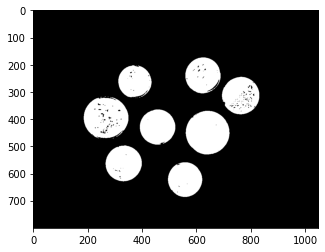

In [63]:
_, coins_binary = cv2.threshold(coins_preprocessed, 130, 255, cv2.THRESH_BINARY)

# se invirte la imagen para obtener las monedas
coins_binary = cv2.bitwise_not(coins_binary)
plt.imshow(cv2.cvtColor(coins_binary, cv2.COLOR_GRAY2RGB))

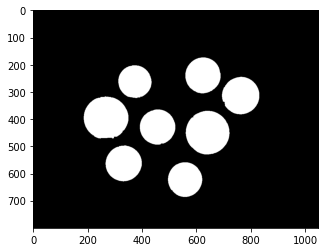

In [65]:
# se obtiene la morfologia de las monedas erosionando y dilatando consiguindo eliminar el ruido
morph_kernel = np.ones((15,15),np.uint8)
coins_morph = cv2.morphologyEx(coins_binary, cv2.MORPH_CLOSE, morph_kernel)

plt.imshow(cv2.cvtColor(coins_morph, cv2.COLOR_GRAY2RGB))

Number of coins:  8


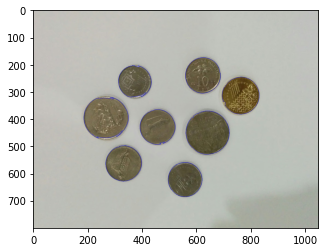

In [66]:
# se encuentran los contornos
coins_contours, _ = cv2.findContours(coins_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# se hace una copia de la imagen
coins_and_contours = np.copy(coins)

# se ncuentran los contornos de una area suficientemente grande
min_coin_area = 60
large_contours = [cnt for cnt in coins_contours if cv2.contourArea(cnt) > min_coin_area]

# se dibujan los contornos
cv2.drawContours(coins_and_contours, large_contours, -1, (255,0,0))

plt.imshow(cv2.cvtColor(coins_and_contours, cv2.COLOR_BGR2RGB))

# se imprime el numro de contornos
print('Number of coins: ', len(large_contours))

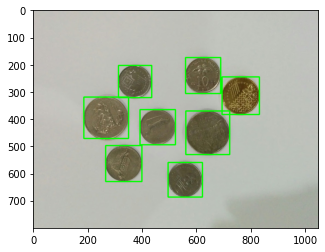

In [67]:
# se crea una copia de la imagen para dibujar cuadros delimitadores
bounding_img = np.copy(coins)

# para cada contorno, encuentre un cuadro delimitador y dibuje un rectángulo
for contour in large_contours:
  x, y, w, h = cv2.boundingRect(contour)
  cv2.rectangle(bounding_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

plt.imshow(cv2.cvtColor(bounding_img, cv2.COLOR_BGR2RGB))

In [71]:
# Lea la imagen en escala de grises configurando 0 en los argumentos
img_gray = cv2.imread('face.jpg',0)
height,width = img_gray.shape[:2]
N = height * width

In [72]:
# Inicializar valores de intensidad con 256 ceros
intensity_count = [0] * 256
high_contrast = np.zeros(img_gray.shape)

In [73]:
# Encuentra el número de píxeles para cada intensidad
for i in range(0,height):
  for j in range(0,width):
    intensity_count[img_gray[i][j]] += 1

In [74]:
L = 256
intensity_count,total_values_used = np.histogram(img.flatten(),L,[0,L])
# Cálculo de la función de densidad de probabilidad -> basado en frecuencia/recuento
pdf_list = np.ceil(intensity_count*(L-1)/img.size)
# Cálculo de la función de distribución acumulada
cdf_list = pdf_list.cumsum()

In [75]:
# Aplicar las nuevas intensidades en nuestra nueva imagen
for y in range(0, height):
  for x in range(0, width):
    high_contrast[y,x] = cdf_list[img_gray[y,x]]

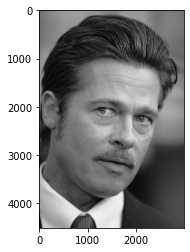

In [76]:
# esta es una imagen mucho más nítida
plt.imshow(high_contrast, cmap='gray')

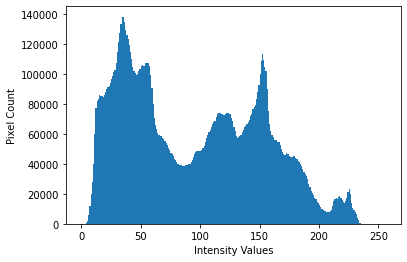

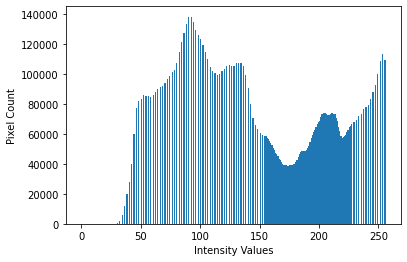

In [77]:
plt.hist(img_gray.ravel(),256,[0,256])
plt.xlabel('Intensity Values')
plt.ylabel('Pixel Count')
plt.show()

plt.hist(high_contrast.ravel(),256,[0,256])
plt.xlabel('Intensity Values')
plt.ylabel('Pixel Count')
plt.show()

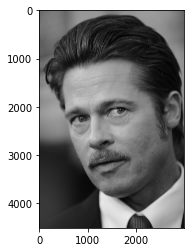

In [78]:
# Giro Horizontal

flip_img = cv2.flip(img_gray, 1)
plt.imshow(flip_img, cmap='gray')

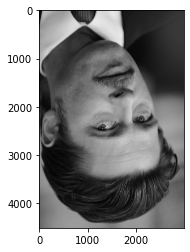

In [79]:
# Vertical
flip_img = cv2.flip(img_gray, 0)
plt.imshow(flip_img, cmap='gray')

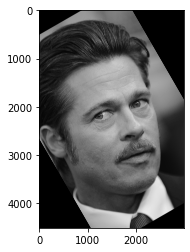

In [80]:
h, w = img_gray.shape
M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), 30, 1)
rotated_img = cv2.warpAffine(img_gray, M, (w, h))
plt.imshow(rotated_img, cmap='gray')

Comparación de imágenes

En las imágenes, generalmente usamos métricas importantes al comparar la similitud como:

MSE -> Error cuadrático medio

SSIM -> Índice de similitud estructural

SSIM intenta modelar el cambio percibido en la información estructural de la imagen, mientras que MSE en realidad está estimando los errores percibidos. Hay una diferencia sutil entre los dos, pero los resultados son espectaculares. A diferencia de MSE, el valor de SSIM puede variar entre -1 y 1, donde 1 indica una similitud perfecta.

Intensidad del patrón -> Diferencias al cuadrado entre los valores de intensidad transformados por una función de tipo $\frac{1}{1+x}$ y resumidos

Información mutua

In [81]:
def mse(imageA, imageB):
  # El 'Mean Squared Error' entre las dos imagenes es la
  # suma de la diferencia al cuadrado entre las dos imagenes;
  # NOTA: las dos imagenes deben tener la misma dimension
  err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
  err /= float(imageA.shape[0] * imageA.shape[1])
  # een la salida del MSE, mientras más bajo el error,
  # más "similares" son las dos imagenes
  return err

In [82]:
mse(rotated_img, img_gray)

6086.994350329084

In [83]:
mse(flip_img, img_gray)

5063.2442870950945